In [1]:
import pandas as pd

In [4]:
dataset = pd.read_csv('./data/train.csv')
del dataset['ID']
classes = pd.read_csv('./data/program_class.csv')
dataset = pd.concat([dataset, classes["class_labels"]], axis=1)
dataset.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,class_labels
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto,ingeniería
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo,arte
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,ciencias
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto,derecho
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo,tecnología


In [5]:
from pycaret.classification import *

In [6]:
s = setup(data = dataset, target = 'RENDIMIENTO_GLOBAL', session_id = 23)

,Description,Value
0,Session id,23
1,Target,RENDIMIENTO_GLOBAL
2,Target type,Multiclass
3,Target mapping,"alto: 0, bajo: 1, medio-alto: 2, medio-bajo: 3"
4,Original data shape,"(692500, 12)"
5,Transformed data shape,"(692500, 60)"
6,Transformed train set shape,"(484749, 60)"
7,Transformed test set shape,"(207751, 60)"
8,Numeric features,1
9,Categorical features,10


In [7]:
from pycaret.classification import ClassificationExperiment
exp1 = ClassificationExperiment()

In [8]:
exp1.setup(data = dataset, target = 'RENDIMIENTO_GLOBAL', session_id = 23, n_jobs= 8)

,Description,Value
0,Session id,23
1,Target,RENDIMIENTO_GLOBAL
2,Target type,Multiclass
3,Target mapping,"alto: 0, bajo: 1, medio-alto: 2, medio-bajo: 3"
4,Original data shape,"(692500, 12)"
5,Transformed data shape,"(692500, 60)"
6,Transformed train set shape,"(484749, 60)"
7,Transformed test set shape,"(207751, 60)"
8,Numeric features,1
9,Categorical features,10


In [35]:
exp1.dataset_transformed.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,...,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
427927,20183.0,1.664298,1.533911,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
174074,20195.0,1.791667,1.460920,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
433582,20195.0,1.640811,1.426440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
402239,20195.0,1.447136,1.406953,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
557384,20183.0,0.396624,1.460920,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


(array([ 14018.,   4289., 112435., 338387.,  41030.,  60377.,  21433.,
         56442.,  42200.,   1889.]),
 array([1.24477887, 1.30242059, 1.36006232, 1.41770404, 1.47534576,
        1.53298748, 1.59062921, 1.64827093, 1.70591265, 1.76355438,
        1.8211961 ]),
 <BarContainer object of 10 artists>)

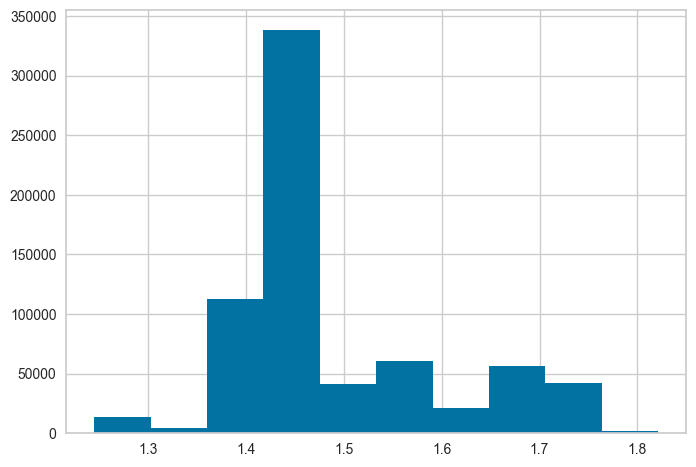

In [9]:
import matplotlib.pyplot as plt
plt.hist(exp1.dataset_transformed["ESTU_PRGM_DEPARTAMENTO"])

(array([  1150.,   4379.,  12478.,   9898.,  47730.,  69454., 171457.,
        275687.,  98930.,   1337.]),
 array([0.08446873, 0.29271505, 0.50096137, 0.70920769, 0.91745401,
        1.12570033, 1.33394665, 1.54219297, 1.75043929, 1.95868561,
        2.16693193]),
 <BarContainer object of 10 artists>)

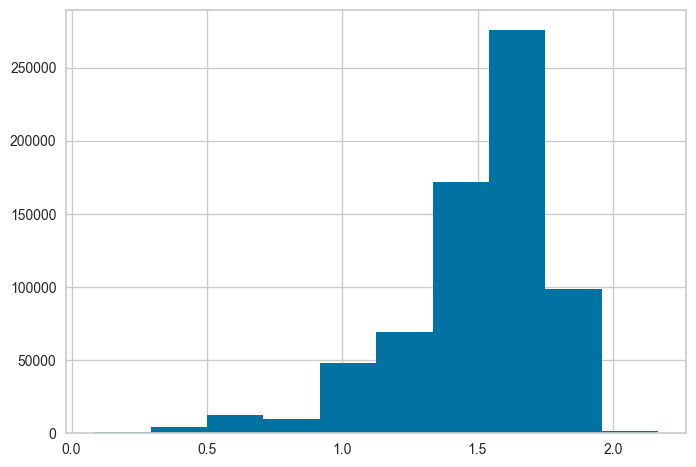

In [10]:
plt.hist(exp1.dataset_transformed["ESTU_PRGM_ACADEMICO"])

In [9]:
exp1.compare_models(exclude=["et"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4327,0.7034,0.4327,0.4166,0.4199,0.2432,0.2452,6.6550
gbc,Gradient Boosting Classifier,0.4216,0.0000,0.4216,0.4073,0.4101,0.2285,0.2303,49.2810
ada,Ada Boost Classifier,0.4128,0.0000,0.4128,0.3939,0.3973,0.2166,0.2189,6.6820
ridge,Ridge Classifier,0.4105,0.0000,0.4105,0.3858,0.3825,0.2133,0.2194,1.6810
lda,Linear Discriminant Analysis,0.4098,0.0000,0.4098,0.4036,0.4045,0.2130,0.2138,2.5520
lr,Logistic Regression,0.4077,0.0000,0.4077,0.3902,0.3927,0.2099,0.2123,36.2920
rf,Random Forest Classifier,0.3923,0.6557,0.3923,0.3830,0.3865,0.1895,0.1899,13.2590
qda,Quadratic Discriminant Analysis,0.3897,0.0000,0.3897,0.3685,0.3684,0.1857,0.1894,2.6470
nb,Naive Bayes,0.3845,0.6453,0.3845,0.3642,0.3641,0.1787,0.1823,1.5880
knn,K Neighbors Classifier,0.3640,0.6124,0.3640,0.3490,0.3507,0.1515,0.1532,15.7880


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=8, num_leaves=31, objective=None,
               random_state=23, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [13]:
best_model = exp1.create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4376,0.7094,0.4376,0.4204,0.4242,0.2498,0.2518
1,0.4349,0.7054,0.4349,0.4194,0.4228,0.2462,0.2480
2,0.4371,0.7071,0.4371,0.4211,0.4244,0.2491,0.2511
3,0.4367,0.7071,0.4367,0.4205,0.4242,0.2486,0.2505
4,0.4327,0.7051,0.4327,0.4172,0.4206,0.2434,0.2452
5,0.4327,0.7072,0.4327,0.4164,0.4199,0.2433,0.2453
6,0.4324,0.7037,0.4324,0.4164,0.4201,0.2429,0.2447
7,0.4332,0.7064,0.4332,0.4166,0.4203,0.2439,0.2458
8,0.4333,0.7048,0.4333,0.4179,0.4213,0.2441,0.2459


In [16]:
best_model_tuned = exp1.tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4367,0.7081,0.4367,0.4195,0.4232,0.2486,0.2507
1,0.4330,0.7035,0.4330,0.4178,0.4207,0.2437,0.2456
2,0.4348,0.7061,0.4348,0.4192,0.4225,0.2462,0.2481
3,0.4364,0.7061,0.4364,0.4202,0.4235,0.2482,0.2502
4,0.4340,0.7042,0.4340,0.4193,0.4224,0.2450,0.2468
5,0.4324,0.7053,0.4324,0.4158,0.4191,0.2430,0.2451
6,0.4319,0.7020,0.4319,0.4161,0.4195,0.2422,0.2441
7,0.4300,0.7044,0.4300,0.4138,0.4174,0.2397,0.2415
8,0.4318,0.7033,0.4318,0.4160,0.4194,0.2421,0.2439


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


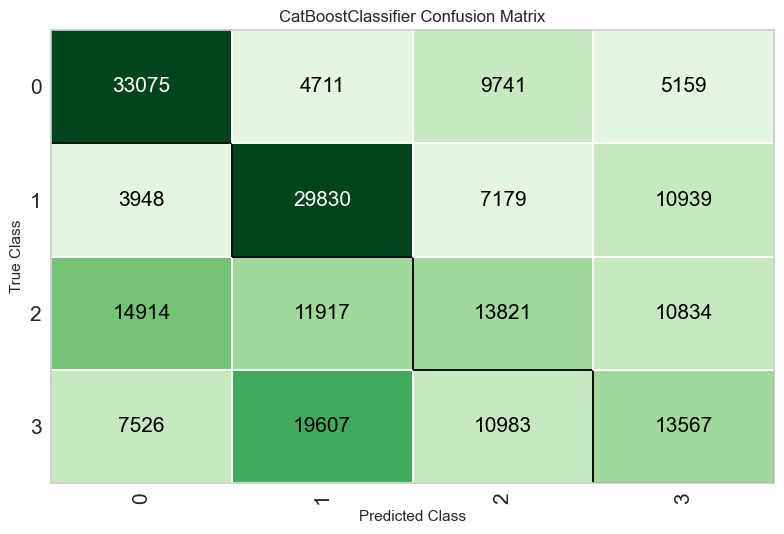

In [21]:
plot_model(best_model_tuned, plot = 'confusion_matrix')

In [10]:
best_model2 = exp1.create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4334,0.7062,0.4334,0.4159,0.4196,0.2442,0.2462
1,0.4312,0.7023,0.4312,0.4151,0.4185,0.2412,0.2431
2,0.4348,0.7047,0.4348,0.4187,0.4218,0.2460,0.2481
3,0.4364,0.7052,0.4364,0.4204,0.4237,0.2482,0.2502
4,0.4332,0.7031,0.4332,0.4185,0.4216,0.2440,0.2458
5,0.4308,0.7037,0.4308,0.4138,0.4171,0.2408,0.2429
6,0.4318,0.7014,0.4318,0.4163,0.4196,0.2421,0.2440
7,0.4314,0.7036,0.4314,0.4144,0.4182,0.2416,0.2436
8,0.4306,0.7008,0.4306,0.4147,0.4179,0.2405,0.2424


In [ ]:
best_model_tuned2 = exp1.tune_model(best_model2)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:39:38
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063829 seconds.
You can set `force_col_wise=true` to remove the overhea

In [7]:
best_model3 = exp1.create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4238,0.0000,0.4238,0.4080,0.4106,0.2313,0.2335
1,0.4200,0.0000,0.4200,0.4051,0.4078,0.2264,0.2283
2,0.4231,0.0000,0.4231,0.4084,0.4105,0.2305,0.2326
3,0.4240,0.0000,0.4240,0.4099,0.4119,0.2317,0.2338
4,0.4198,0.0000,0.4198,0.4057,0.4079,0.2261,0.2281
5,0.4202,0.0000,0.4202,0.4053,0.4075,0.2266,0.2288
6,0.4197,0.0000,0.4197,0.4047,0.4071,0.2260,0.2281
7,0.4195,0.0000,0.4195,0.4048,0.4075,0.2257,0.2276
8,0.4190,0.0000,0.4190,0.4036,0.4058,0.2250,0.2272


In [ ]:
best_model_tuned3 = exp1.tune_model(best_model3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:07:52
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [10]:
test_dataset = pd.read_csv('./data/test.csv')

In [11]:
predictions = exp1.predict_model(best_model_tuned2, data=test_dataset)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [27]:
predictions.head()

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,prediction_label,prediction_score
0,0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si,bajo,0.4023
1,1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No,medio-alto,0.3606
2,2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No,alto,0.6039
3,3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No,bajo,0.4892
4,4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo,0.4926


In [12]:
df_filter = predictions[["ID", "prediction_label"]]
df_filter = df_filter.rename(columns={"prediction_label": "RENDIMIENTO_GLOBAL"})
df_filter.head()

,ID,RENDIMIENTO_GLOBAL
0,550236,medio-bajo
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,bajo


In [14]:
df_filter.to_csv("data/submission.csv", index=False)